# Исследование объявлений о продаже квартир

### Описание проекта

Используя данные сервиса Яндекс Недвижимость (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет), определим рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd #подгружаем библиотеку pandas для последующей работы
import matplotlib.pyplot as plt # загрузили библиотеку для работы с гистрограммами 
import os
import seaborn as sns
import numpy as np

In [2]:
pth1 = r"C:\Users\artem\Downloads\real_estate_data.csv"  # Локальный путь
pth2 = '/datasets/real_estate_data.csv'  # Внешний путь

if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')
else:
    display('Файл real_estate_data.csv не найден ни по одному из указанных путей.')
    exit()

display(df.head())
display(df['first_day_exposition'].unique())

# Преобразуем дату в datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])  # Автоматическое определение формата

display(df['first_day_exposition'].unique())  # Проверяем результат преобразования
display(df['first_day_exposition'].dtype)  # Проверяем тип данных столбца

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

dtype('<M8[ns]')

In [3]:
df.info() # смотрим общую информацию 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

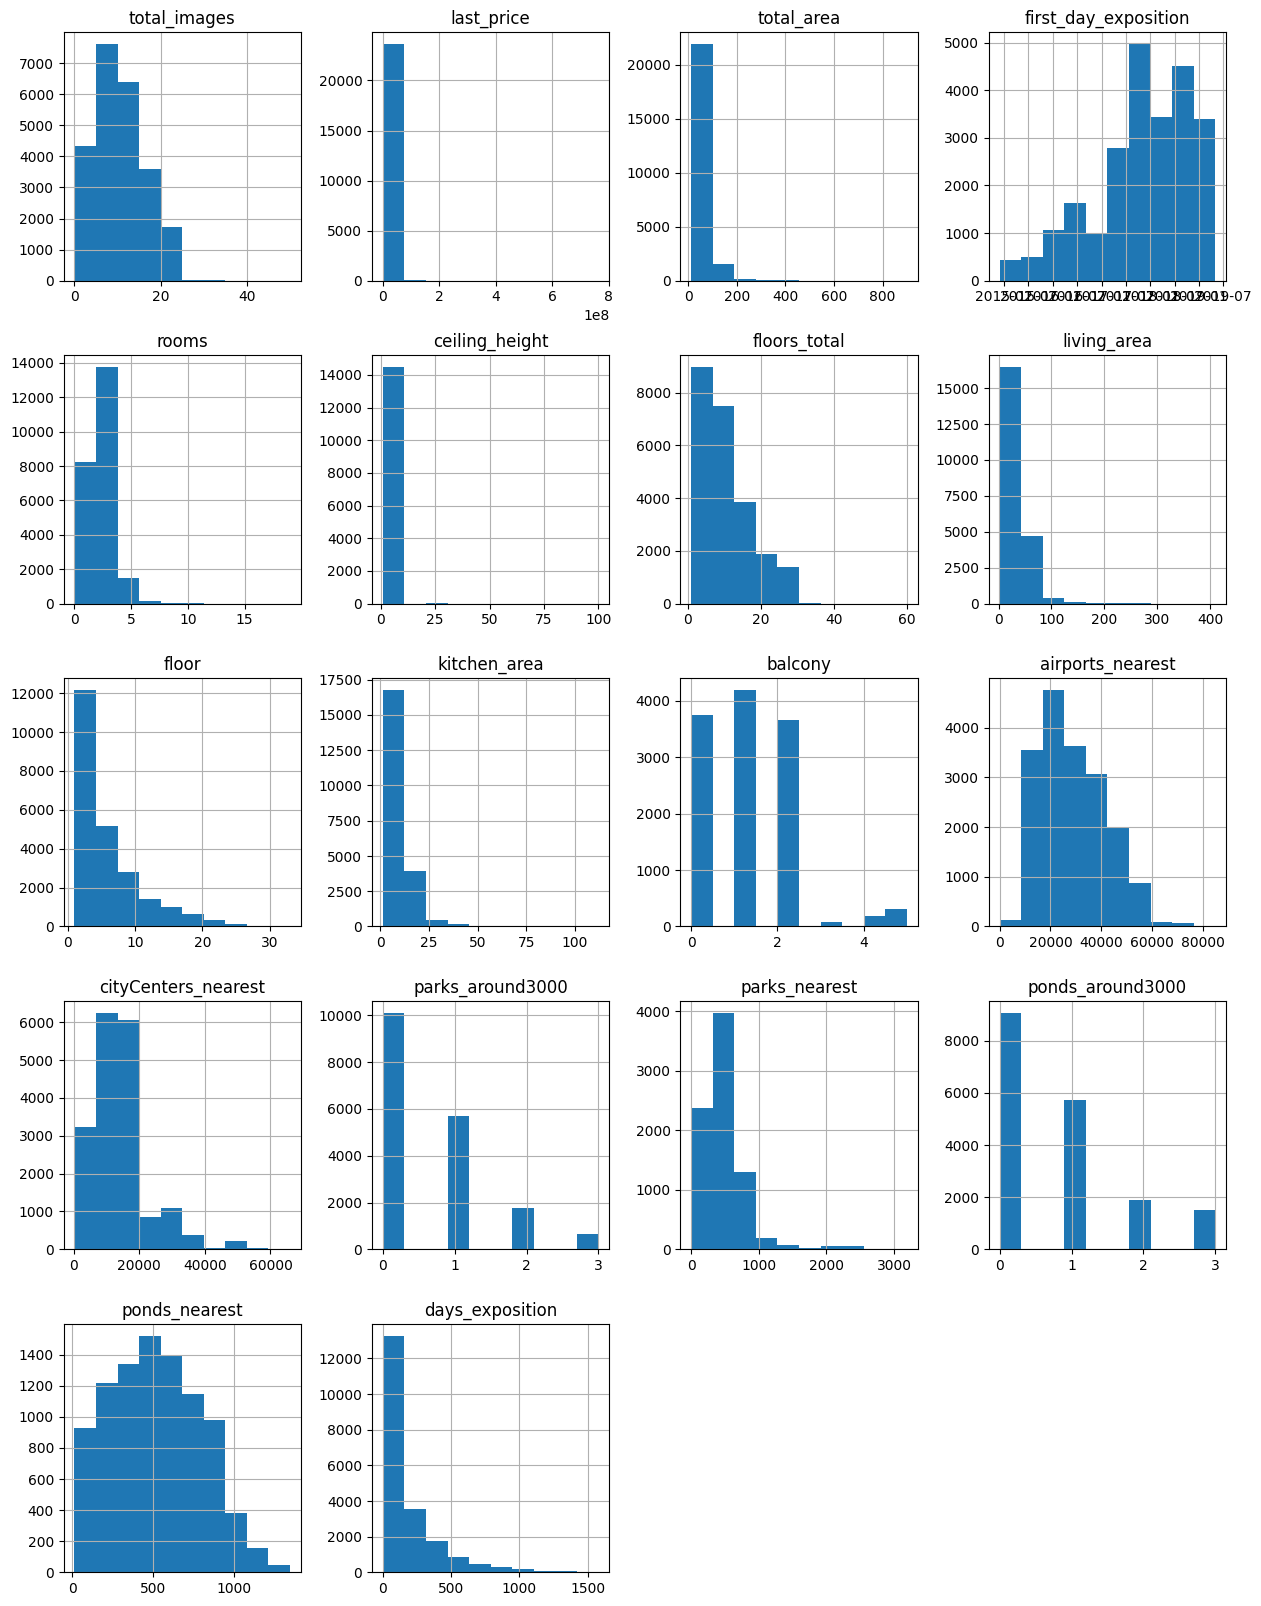

In [4]:
df.hist(figsize=(15, 20)) # тут же строим гистограммы для всех числовых столбцов таблицы на одном графике. 
plt.show()

In [5]:
df.head(10) # выводим первые десять строк на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
df.tail(10) # выводим первые десять строк на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Что мы можем сказать после первичного ознакомления с данными:

• **last_price:** Данные сильно скошены вправо, указывая на наличие высоких цен на недвижимость, составляющих меньшинство наблюдений. Необходимо будет исследовать выбросы.
• total_area: Аналогично last_price, распределение скошено вправо, свидетельствуя о наличии больших площадей, представленных меньшинством объектов. Необходимо изучить выбросы.

• **rooms:** Распределение сосредоточено вокруг небольшого количества комнат (1-3), с небольшим количеством объектов, имеющих большее количество комнат.

• **ceiling_height**: Распределение сосредоточено вокруг определенного значения, возможно, наиболее распространенной высоты потолков. Присутствуют выбросы с высокими значениями.

• **floors_total**: Распределение показывает, что большая часть зданий имеет небольшое количество этажей.

• **living_area**: Распределение скошено вправо, аналогично total_area и last_price.

• **floor**: Распределение показывает, что квартиры распределены по этажам относительно равномерно, хотя есть пик на первых этажах.

• **kitchen_area**: Распределение скошено вправо, с большим количеством объектов, имеющих небольшую площадь кухни.

• **balcony**: Большинство объектов не имеют балкона (сосредоточение около нуля).

• **airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest:** Распределения этих признаков (расстояния до объектов инфраструктуры) показывают скопление значений, что свидетельствует о кластеризации объектов.  Следует исследовать на предмет выбросов и корреляций с ценой.

• **total_images:** Большинство объявлений имеют относительно небольшое количество изображений.

• **days_exposition:** Распределение скошено вправо, указывающее на то, что большая часть объектов продается сравнительно быстро, но есть объекты, которые продаются значительно дольше.


### Шаг 2. Выполним предобработку данных

In [7]:
missing_values = df.isnull().sum() # Считаем количество пропущенных значений по каждому столбцу
missing_values

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
missing_values = missing_values[missing_values > 0] # Оставим только те, где есть пропуски
display(missing_values)

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64

In [9]:
# Если не указано, был ли объект апартаментом — предположим, что нет
df['is_apartment'] = df['is_apartment'].fillna(False)

# Если не указано число балконов — скорее всего, их нет
df['balcony'] = df['balcony'].fillna(0)

# Если не указано количество парков/прудов рядом — можно считать, что их 0
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

### Возможные причины пропусков в данных

1. **ceiling_height (высота потолков)**  
   Возможно, продавец не знал точную высоту потолков или посчитал это неважным.

2. **floors_total (всего этажей в доме)**  
   Может отсутствовать для новостроек или объектов, находящихся на этапе строительства.

3. **living_area, kitchen_area (жилая и кухонная площадь)**  
   Часто не указываются, если площадь приблизительная или нет точной информации в документах.

4. **is_apartment (апартаменты или нет)**  
   Продавец мог не понимать разницу между квартирой и апартаментами либо поле автоматически не заполнялось.

5. **balcony (количество балконов)**  
   Пропущено, если балкона нет, либо продавец не считал нужным указывать.

6. **locality_name (название населённого пункта)**  
   Возможно, не была корректно загружена или введена вручную с ошибкой.

7. **airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest**  
   Эти данные могли вычисляться автоматически по координатам — если координаты были неполные, расстояния не рассчитались.

8. **parks_around3000, ponds_around3000**  
   Аналогично: если автоматическая система не нашла объекты поблизости или координаты отсутствовали.

9. **days_exposition (время размещения объявления)**  
   Отсутствует, если объявление ещё активно, или если дата снятия не зафиксирована.

### Рассмотрим типы данных в каждом столбце

In [10]:
df.dtypes # для начала посмотрим на столбцы, в которых нужно будет изменить тип данных

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [11]:
# Преобразуем дату в datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

# Преобразуем логический столбец
df['is_apartment'] = df['is_apartment'].astype(bool)

# Если нужно, можно преобразовать числовые столбцы с целыми значениями:
cols_to_int = ['balcony', 'parks_around3000', 'ponds_around3000']
for col in cols_to_int:
    df[col] = df[col].astype(int)

#### Столбец first_day_exposition содержит даты, но представлен в виде строк (object), поэтому его следует преобразовать в тип datetime, чтобы можно было выполнять временные операции (например, вычислять разницу между датами). Столбец is_apartment отражает логическую информацию — является ли объект апартаментом, — и должен иметь тип bool, а не object.

*Также стоит обратить внимание на числовые столбцы, такие как balcony, parks_around3000, ponds_around3000. Хотя они имеют тип float64, на самом деле содержат только целые значения, поэтому для экономии памяти и улучшения читаемости их можно привести к типу int. Эти изменения помогут упростить дальнейшую обработку данных и повысить точность анализа.*

### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты

In [12]:
unique_before = df['locality_name'].nunique()
display(f"Уникальных значений до очистки: {unique_before}")

'Уникальных значений до очистки: 364'

In [13]:
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е', regex=False)
    .replace(
        [
            r'^деревня\s+',
            r'^поселок\s+',
            r'^посёлок\s+',
            r'^городской поселок\s+',
            r'^городской посёлок\s+',
            r'^поселок городского типа\s+',
            r'^посёлок городского типа\s+',
            r'^садовое товарищество\s+',
            r'^коттеджный поселок\s+',
            r'^коттеджный посёлок\s+',
            r'^село\s+',
            r'^при железнодорожной станции\s+',
            r'^садоводческое некоммерческое товарищество\s+'
        ],
        '',
        regex=True
    )
    .str.strip()
)

In [14]:
unique_after = df['locality_name'].nunique()
display(f"Уникальных значений после очистки: {unique_after}")
display(f"Разница: {unique_before - unique_after}")

'Уникальных значений после очистки: 318'

'Разница: 46'

#### Уникальных значений до очистки: 364
#### Уникальных значений после очистки: 318

#### Разница: 46

### Шаг 3. Добавим в таблицу новые столбцы

In [15]:
# 1. Посчитаем цену за один квадратный метр
df['price_per_square_meter'] = (df['last_price'] / df['total_area']).where(df['total_area'] != 0).round(2)

In [16]:
# 2. День недели публикации (0 — понедельник)
df['day_of_week'] = pd.to_datetime(df['first_day_exposition']).dt.dayofweek

In [17]:
# 3. Месяц публикации
df['month'] = pd.to_datetime(df['first_day_exposition']).dt.month

In [18]:
# 4. Год публикации
df['year'] = pd.to_datetime(df['first_day_exposition']).dt.year

In [19]:
# 5. Тип этажа: 'первый', 'последний', 'другой'
df['floor_type'] = 'другой'
df.loc[df['floor'] == 1, 'floor_type'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'последний'

In [20]:
# 6. Расстояние до центра города в километрах (округление до ближайшего целого)
df['city_center_distance_km'] = (df['cityCenters_nearest'] / 1000).round()
df['city_center_distance_km'] = df['city_center_distance_km'].astype('Int64')  # Int64 сохраняет пропуски (NaN)

### Резюме предобработки данных:

- Добавлены новые признаки, полезные для анализа и построения моделей:

- price_per_square_meter — стоимость квадратного метра жилья;

- day_of_week, month, year — дата публикации, разложенная на составляющие;

- floor_type — тип этажа: первый, последний или другой;

- city_center_distance_km — расстояние до центра города в километрах, округлённое и сохранённое как Int64 (поддерживает пропуски).

- Обеспечена корректная работа с данными:

- Исключено деление на ноль при расчёте стоимости за квадратный метр;

- Преобразованы даты в нужные компоненты;

- Учтены пропущенные значения при преобразовании типов.

#### Эти шаги позволят более глубоко анализировать данные, выявлять закономерности и готовить набор к обучению моделей машинного обучения.

### Шаг 4. Исследовательский анализ данных 

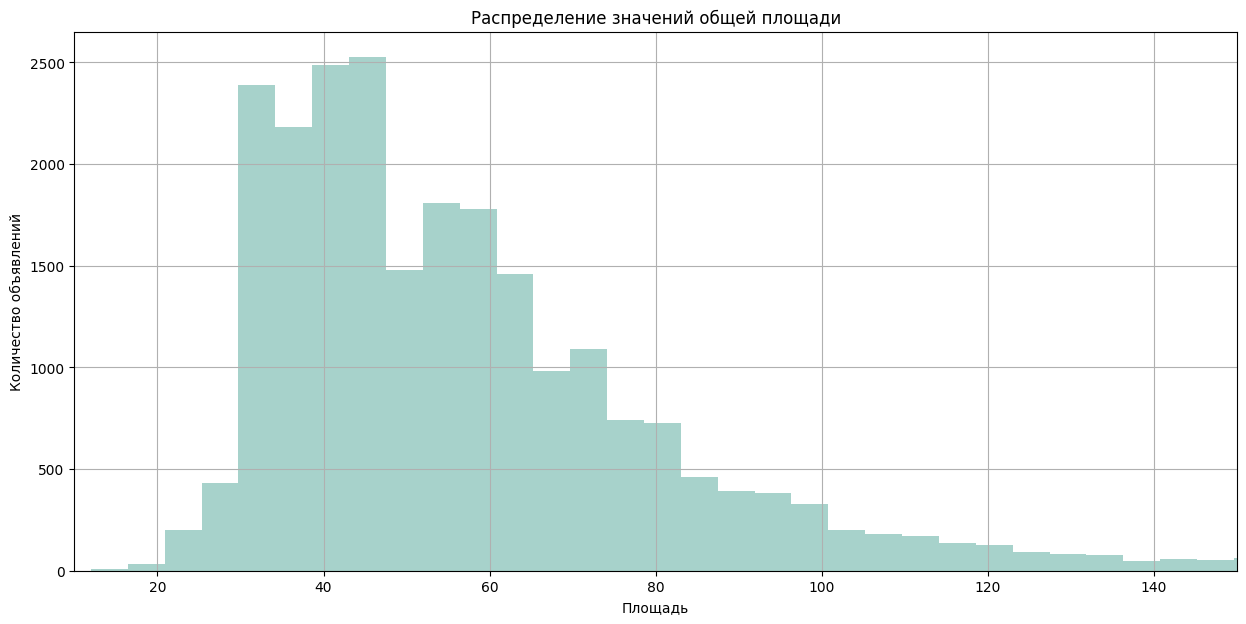

In [21]:
df['total_area'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB')
plt.xlim(10, 150)

plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

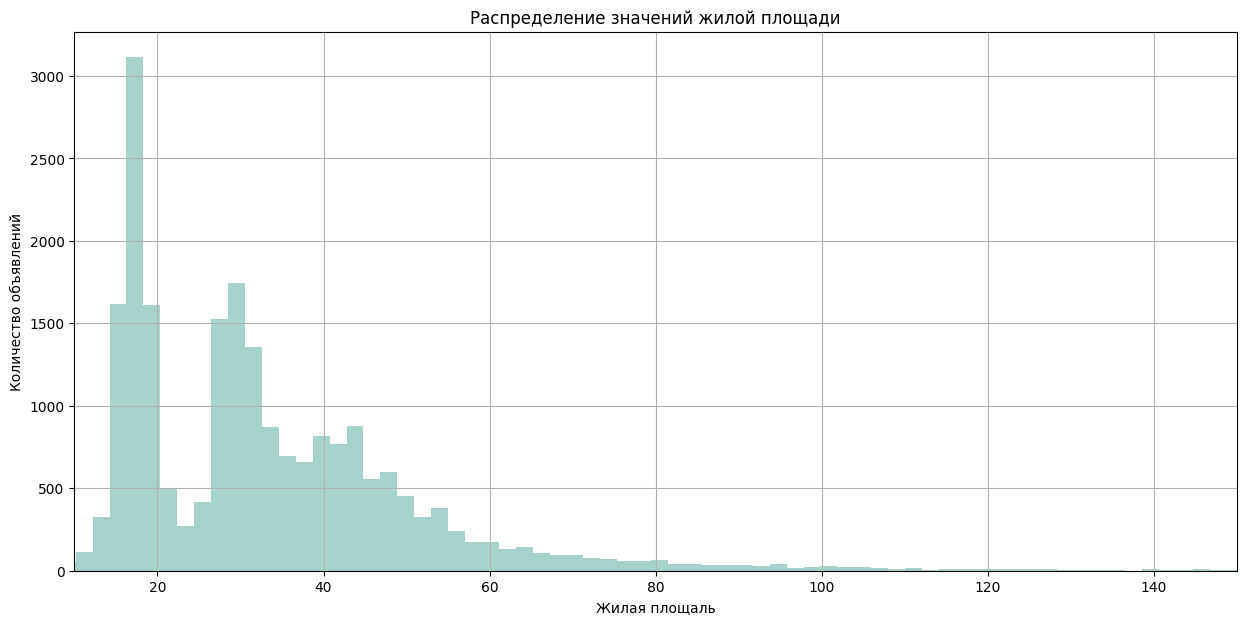

In [22]:
df['living_area'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB') # жилая площадь 
plt.xlim(10, 150)

plt.title('Распределение значений жилой площади')
plt.xlabel('Жилая площаль') 
plt.ylabel('Количество объявлений')
plt.show()

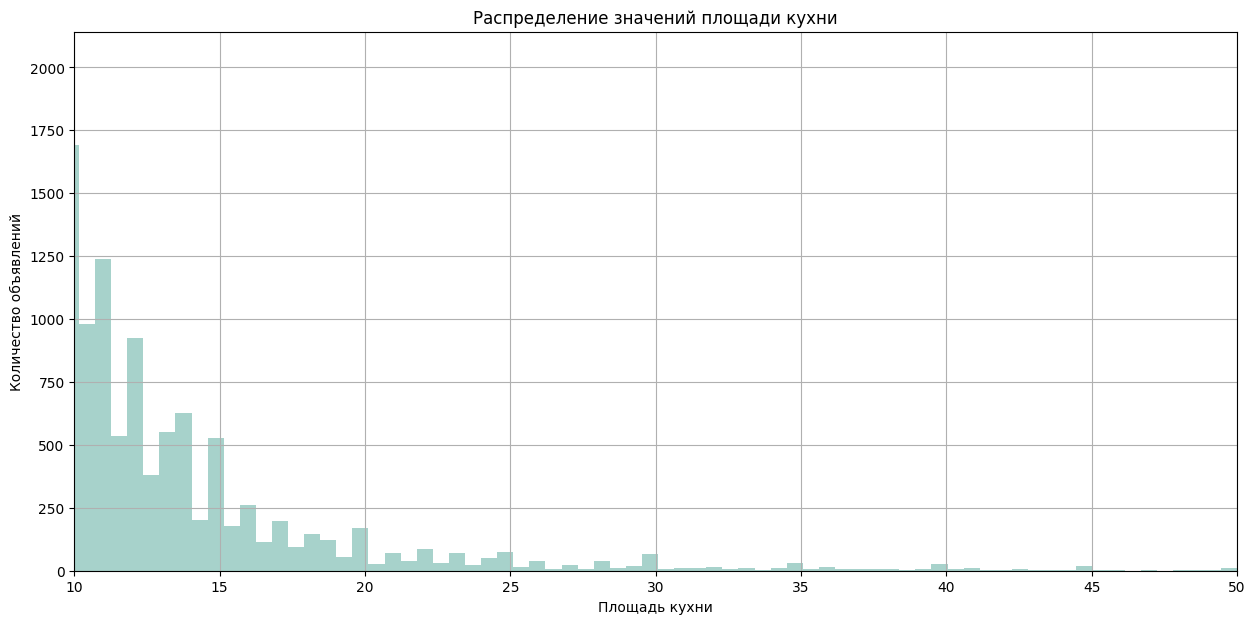

In [23]:
df['kitchen_area'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB') # площадь кухни
plt.xlim(10, 50)

plt.title('Распределение значений площади кухни')
plt.xlabel('Площадь кухни') 
plt.ylabel('Количество объявлений')
plt.show()

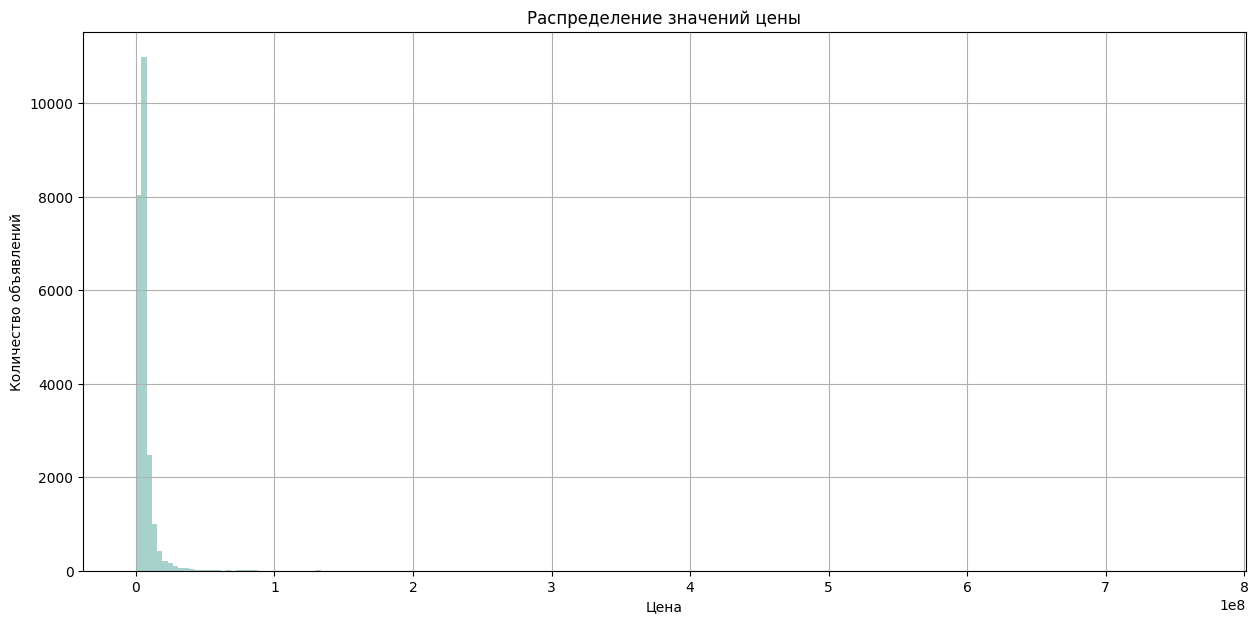

In [24]:
df['last_price'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB') # последняя цена в публикации 

plt.title('Распределение значений цены')
plt.xlabel('Цена') 
plt.ylabel('Количество объявлений')
plt.show()

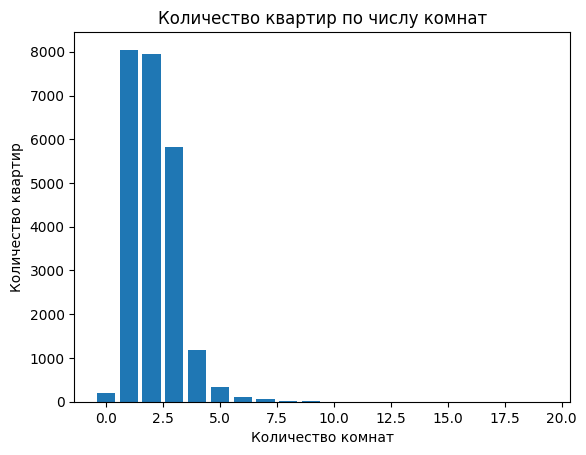

In [25]:
room_counts = df['rooms'].value_counts().sort_index()
plt.bar(room_counts.index, room_counts.values)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Количество квартир по числу комнат')
plt.show()

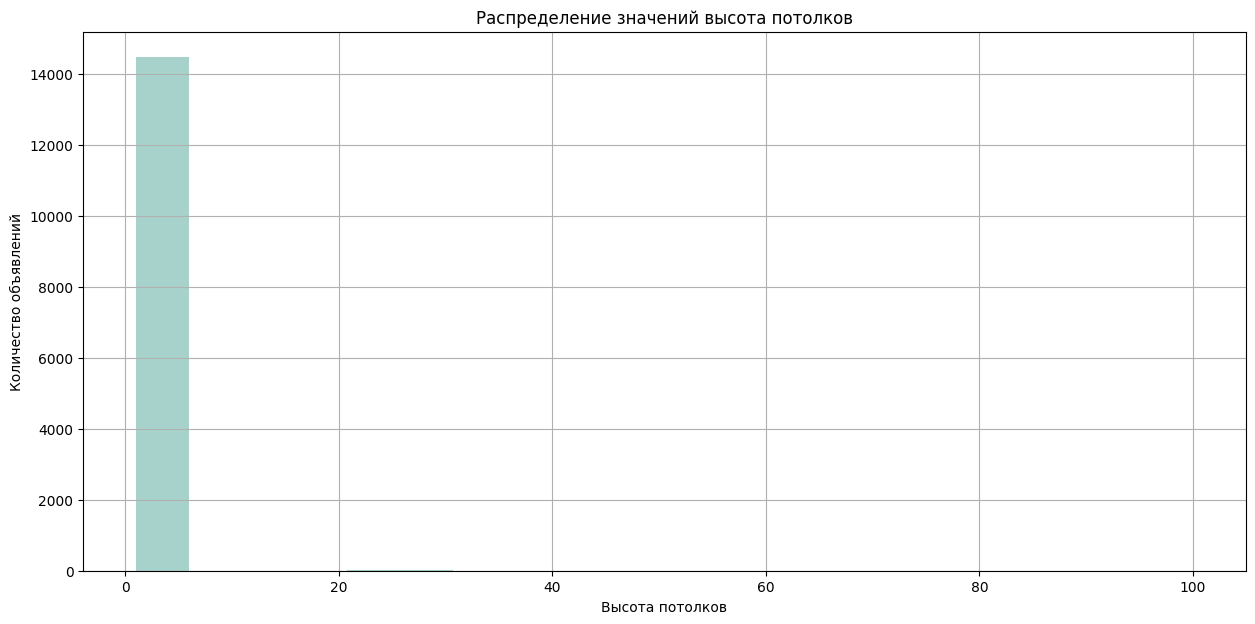

In [26]:
df['ceiling_height'].hist(bins = 20, figsize = (15, 7), color='#A7D2CB') # высота потолков 

plt.title('Распределение значений высота потолков')
plt.xlabel('Высота потолков') 
plt.ylabel('Количество объявлений')
plt.show()

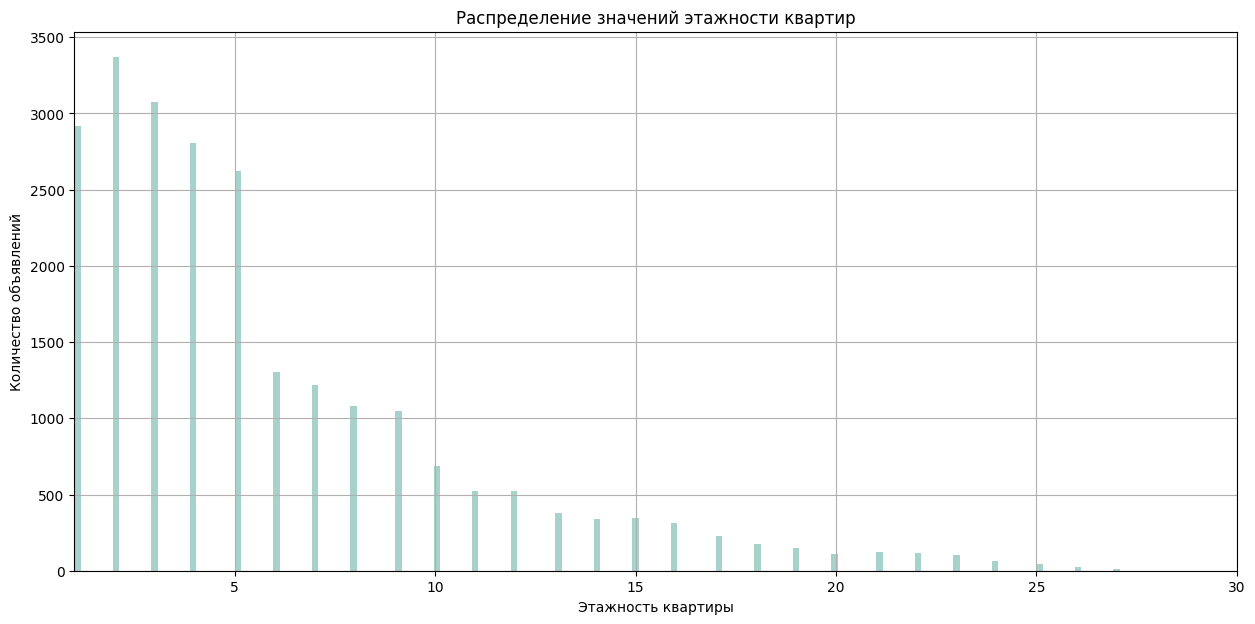

In [27]:
df['floor'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB') # на каком этаже находится квартиры
plt.xlim(1, 30)

plt.title('Распределение значений этажности квартир')
plt.xlabel('Этажность квартиры') 
plt.ylabel('Количество объявлений')
plt.show()

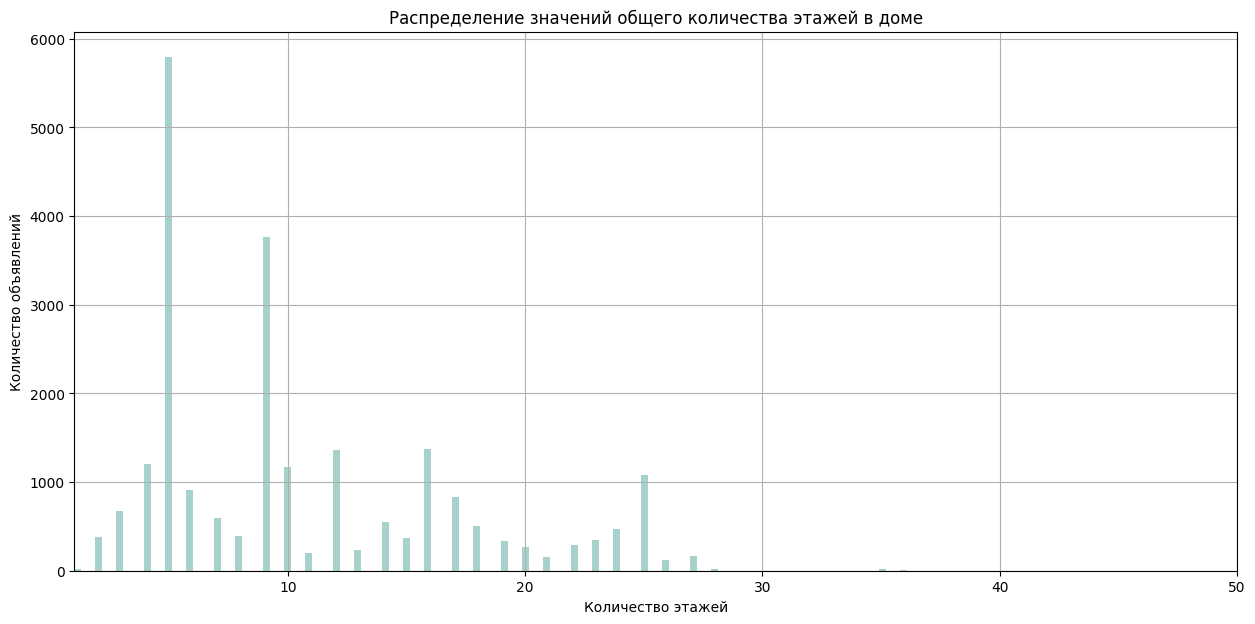

In [28]:
df['floors_total'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB') # общее количество этажей в доме
plt.xlim(1, 50)

plt.title('Распределение значений общего количества этажей в доме')
plt.xlabel('Количество этажей') 
plt.ylabel('Количество объявлений')
plt.show()

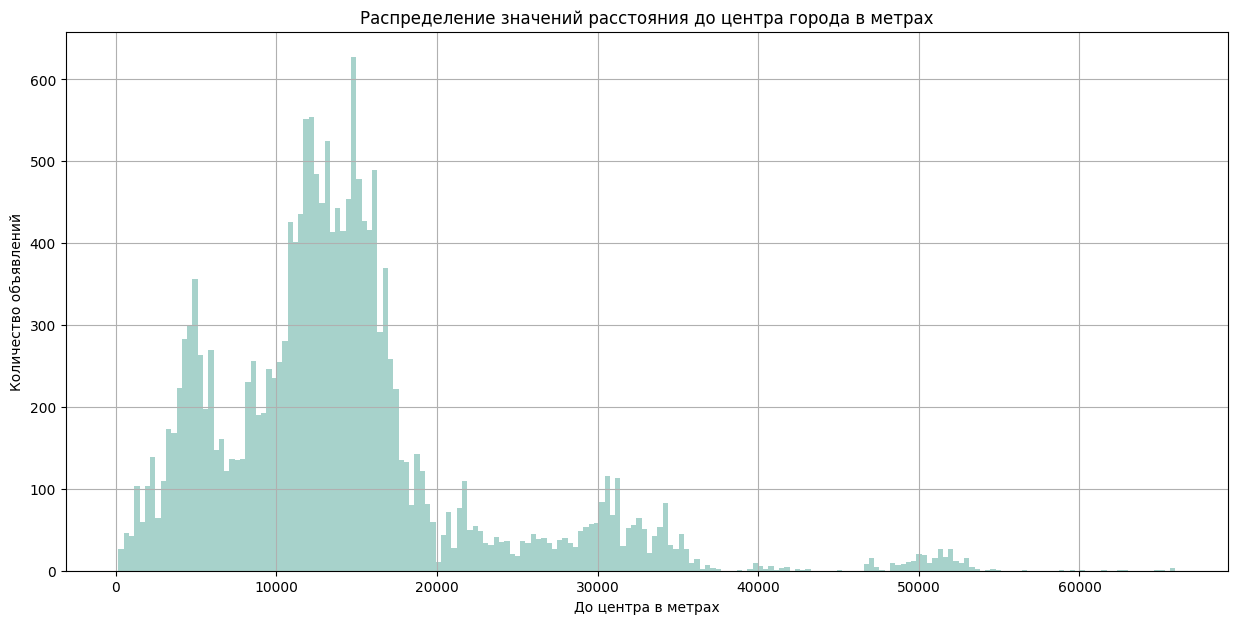

In [29]:
df['cityCenters_nearest'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB') # расстояние до центра города в метрах

plt.title('Распределение значений расстояния до центра города в метрах')
plt.xlabel('До центра в метрах') 
plt.ylabel('Количество объявлений')
plt.show()

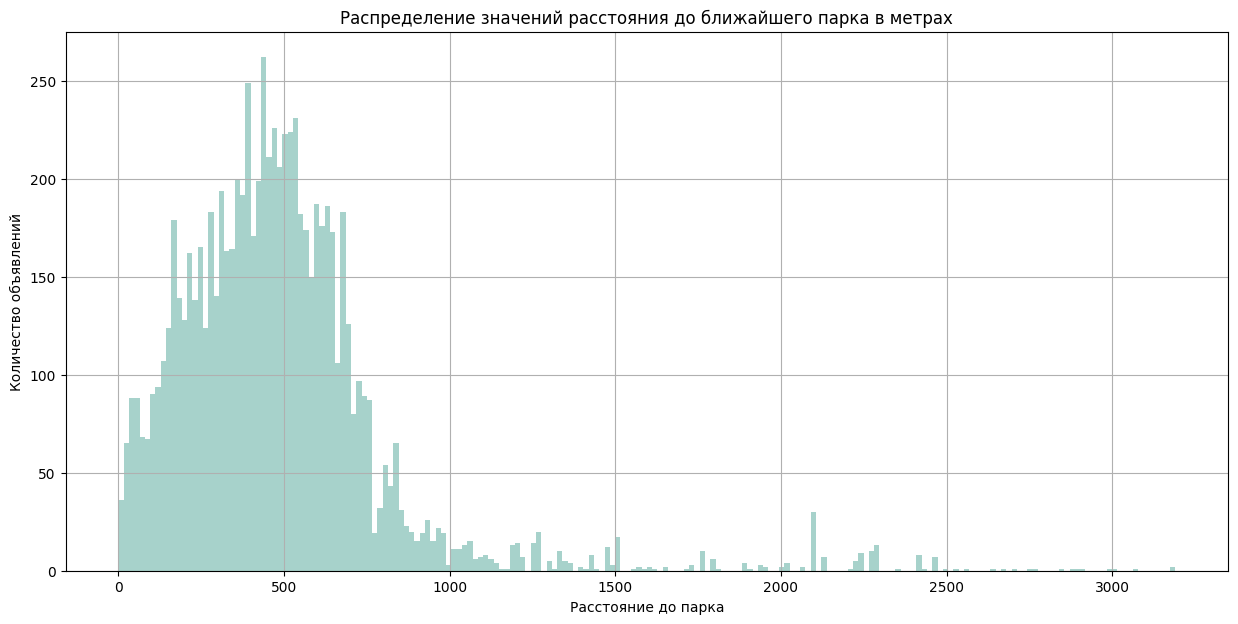

In [30]:
df['parks_nearest'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB') # расстояние до ближайшего парка

plt.title('Распределение значений расстояния до ближайшего парка в метрах')
plt.xlabel('Расстояние до парка') 
plt.ylabel('Количество объявлений')
plt.show()

#### Как мы видим, аномальные значения встречаются в следующих гистрограммах: 

- высота потолков
- цена объекта
- жилая площадь
- количество комнат
- количество этажей

### Анализ аномалий

Например, высота потолков 25 м и 32 м явно являются аномалиями. Скорее всего, это опечатки, и правильные значения — 2.5 м и 3.2 м. Также мы удаляем очевидно аномальные значения в других значениях.

### Коррекция аномалий

In [53]:
MIN_VALID = 2.0
MAX_VALID = 3.5

def fix_ceiling(h):
    if pd.isna(h) or h == 0:
        return np.nan
    if h > MAX_VALID * 10: # Например, 350 -> 3.5
        h = h / 100
    elif h > MAX_VALID:
        h = h / 10
    elif 0 < h < 1:
        h = h * 10

    # Финальная проверка
    if MIN_VALID <= h <= MAX_VALID:
        return h
    elif h < MIN_VALID:
        return MIN_VALID
    return np.nan


df['ceiling_height'] = df['ceiling_height'].apply(fix_ceiling)


display(df['ceiling_height'].describe())

count    14504.000000
mean         2.690508
std          0.242288
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          3.500000
Name: ceiling_height, dtype: float64

#### Посмотрим теперь на наши "аномальные" гистрограммы, корректирую последующие значения

In [32]:
df[df['floors_total'] <= 40]  # Удаляем дома с >40 этажами

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,city_center_distance_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3,381.0,NaN,72490.85,1,3,2017,другой,4
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,0,NaN,45.0,52542.37,0,1,2018,другой,<NA>
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0,NaN,NaN,44091.71,6,2,2018,первый,<NA>
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,173.0,3,196.0,602.0,149511.40,1,3,2017,другой,10


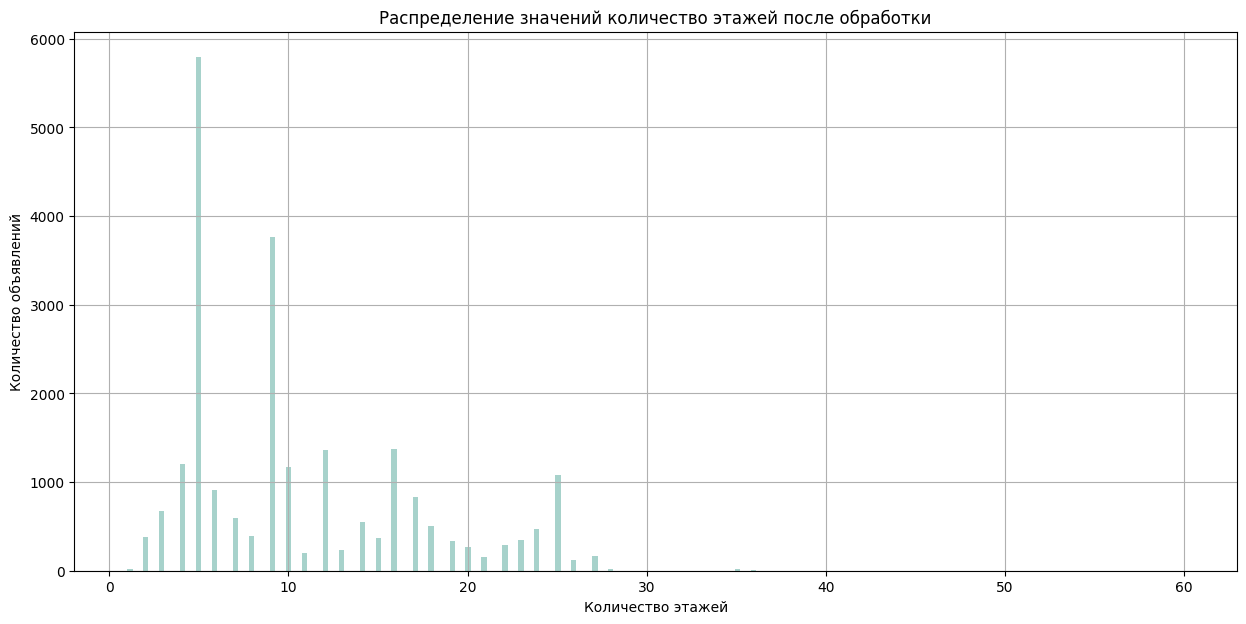

In [33]:
df['floors_total'].hist(bins = 200, figsize = (15, 7), color='#A7D2CB') # количество этажей после обработки

plt.title('Распределение значений количество этажей после обработки')
plt.xlabel('Количество этажей') 
plt.ylabel('Количество объявлений')
plt.show()

### Основные характеристики:

•  Преобладают малоэтажные дома (2-5 этажей) с 1-2 комнатными квартирами.
•  Жилая площадь в основном 20-50 кв.м, кухни небольшие (до 15 кв.м), потолки стандартные (2.5-3м).
•  Большинство квартир на нижних этажах.

Цена и расположение:

•  Основной ценовой сегмент - около 4 миллионов.
•  Хорошая доступность парков (до 1 км).
•  Разное удаление от центра города: есть квартиры ближе к центру (до 10 км) и дальше (10-20 км).

#### Общий вывод:

В основном представлены квартиры небольшого размера и средней ценовой категории, с разным удалением от центра города, но с хорошей доступностью парков.

### Изучим как быстро продавались квартиры

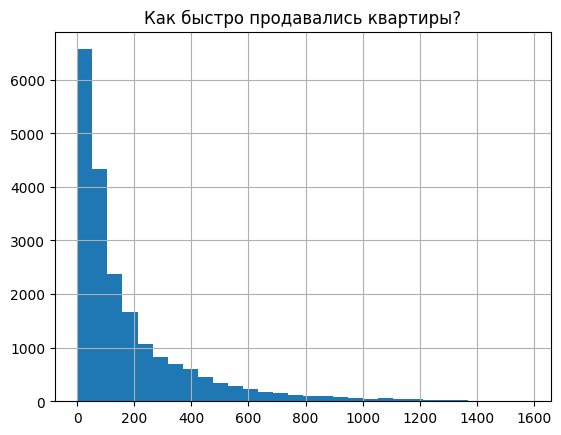

In [34]:
df['days_exposition'].hist(bins=30) # как быстро продавались квартиры
plt.title('Как быстро продавались квартиры?')
plt.show()

### Посчитаем среднее, медиану и другие значения

In [35]:
(df['days_exposition'].describe())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

#### Среднее - 180 дней, а медиана 95

#### Согласно данным, среднее время продажи квартиры составляет 180 дней, что является значительным сроком. Однако медиана составляет 95 дней, что говорит о том, что половина квартир продается быстрее, чем за 95 дней. Чтобы лучше понять картину быстрых и долгих продаж, стоит обратить внимание на 25-й и 75-й процентили. 25% квартир продаются за 45 дней или меньше, а 75% квартир продаются за 232 дня или меньше. Самым быстрым результатом можно считать 1 день, а самым долгим 1580 дней, что является необычно долгим значением (примерно пять лет). Анализ этих квартилей дает более полное представление о скорости продаж, чем просто среднее значение.

### Определим факторы, которые больше всего влияют на общую стоимость объекта, построив зависимости в виде графиков

### Зависимость цены от общей площади

Text(0.5, 1.0, 'Зависимость цены от общей площади')

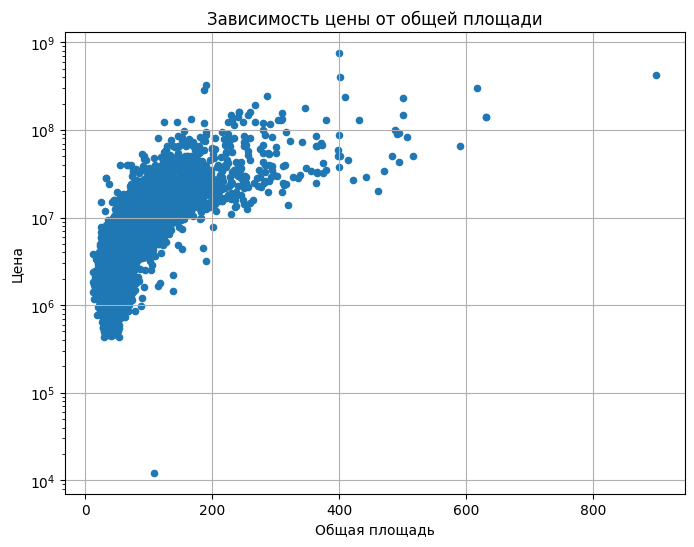

In [36]:
df.plot(x='total_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, logy=True)
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от общей площади')

### Зависимость цены от жилой площади

Text(0.5, 1.0, 'Зависимость цены от жилой площади')

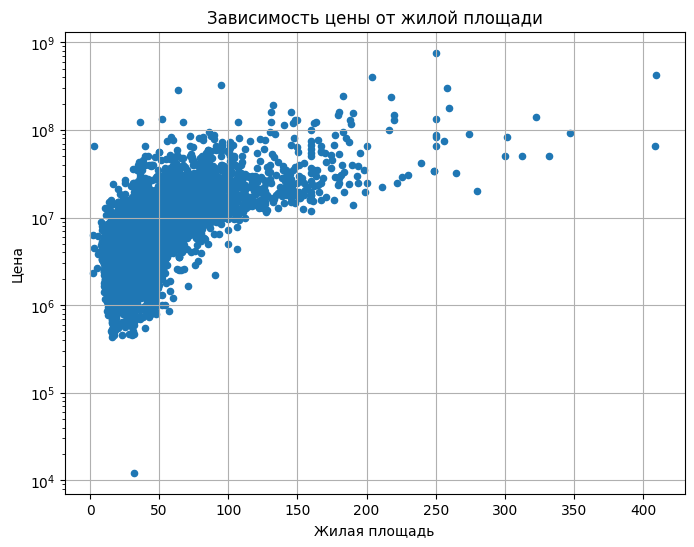

In [37]:
df.plot(x='living_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, logy=True) # зависимость цены от жилой площади
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от жилой площади')

### Зависимость цены от площади кухни

Text(0.5, 1.0, 'Зависимость цены от площади кухни')

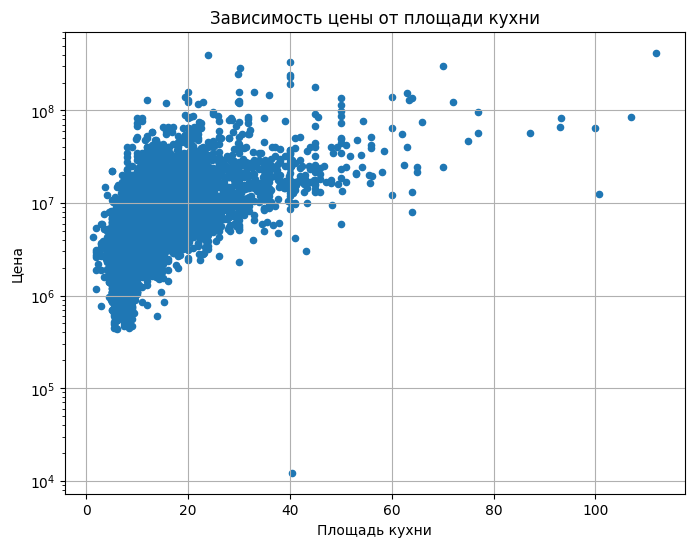

In [38]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(8,6), grid=True, logy=True) # зависимость цены от площади кухни
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади кухни')

### Зависимость цены от количества комнат

Text(0.5, 1.0, 'Зависимость цены от количества комнат')

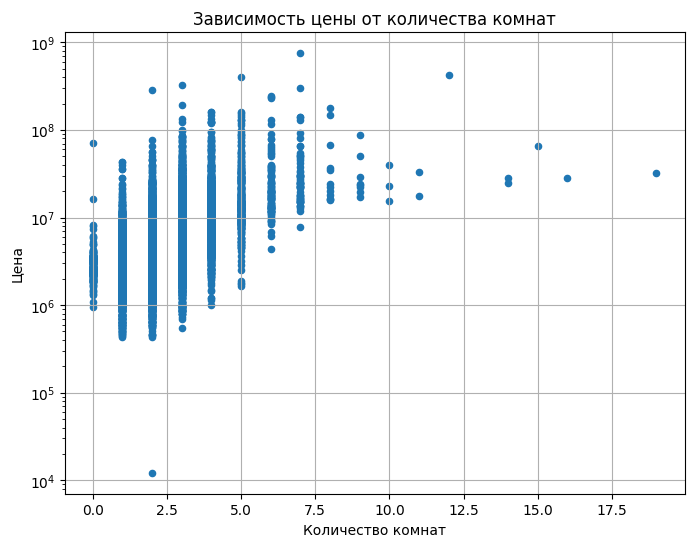

In [39]:
df.plot(x='rooms', y='last_price', kind='scatter', figsize=(8,6), grid=True, logy=True) # зависимость цены от количества комнат
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.title('Зависимость цены от количества комнат')

### Зависимость цены от этажности 

Text(0.5, 1.0, 'Зависимость цены от количества этажей')

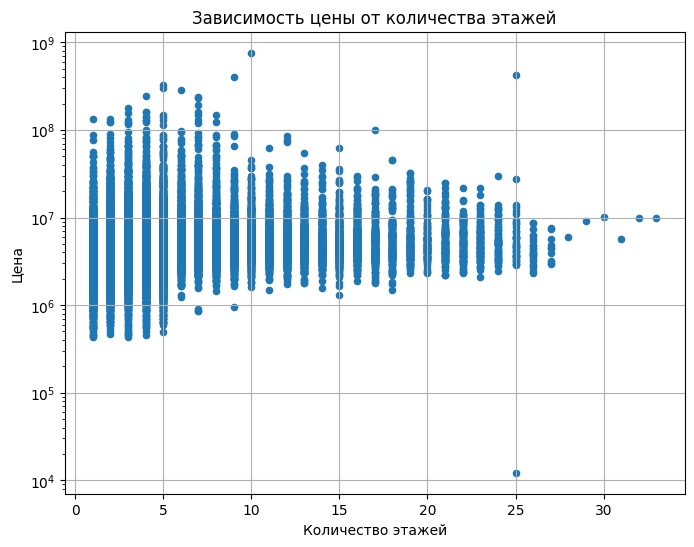

In [40]:
df.plot(x='floor', y='last_price', kind='scatter', figsize=(8,6), grid=True, logy=True) # зависимость цены этажа квартиры
plt.xlabel('Количество этажей')
plt.ylabel('Цена')
plt.title('Зависимость цены от количества этажей')

### Зависимость цены от даты размещения

#### Наша колонка first_day_exposition, указанная для оси Y, не является числовой.

#### Преобразуем 'first_day_exposition' в числовой формат. 

In [41]:
# 1. Убедимся, что колонка имеет формат даты:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], errors='coerce')  # errors='coerce' заменит некорректные даты на NaT

In [42]:
# 2. Преобразуем дату в Unix timestamp (секунды с начала эпохи):
df['first_day_exposition'] = df['first_day_exposition'].astype('int64') // 10**9  # делим на 10**9, чтобы получить секунды, а не наносекунды

#### Строим график

<AxesSubplot:xlabel='last_price', ylabel='first_day_exposition'>

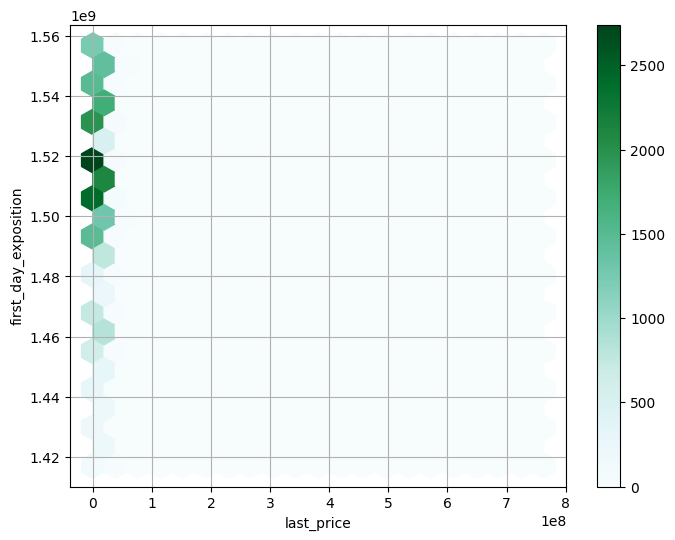

In [43]:
# После сторим график:
df.plot(x='last_price', y='first_day_exposition', kind='hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True)

### Зависимость цены от типа этажа (первый, последний, другой)

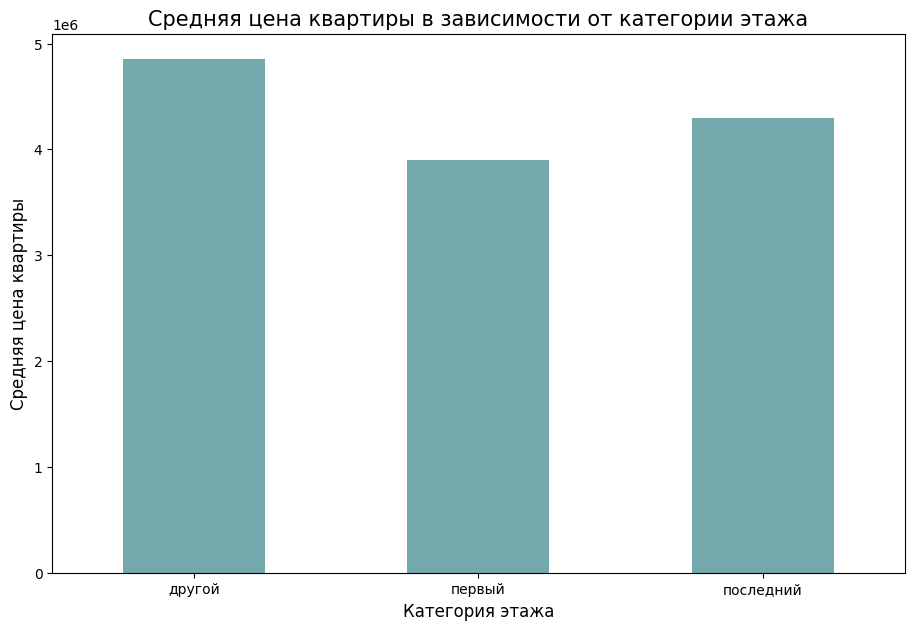

In [54]:
# код ревьюера

df.groupby('floor_type')['last_price'].median().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от категории этажа', size=15)
plt.xlabel('Категория этажа', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

### Зависимость цены от даты размещения (день недели, месяц, год):

['2019-03-07T00:00:00.000000000' '2018-12-04T00:00:00.000000000'
 '2015-08-20T00:00:00.000000000' ... '2014-12-29T00:00:00.000000000'
 '2016-09-12T00:00:00.000000000' '2015-07-19T00:00:00.000000000']


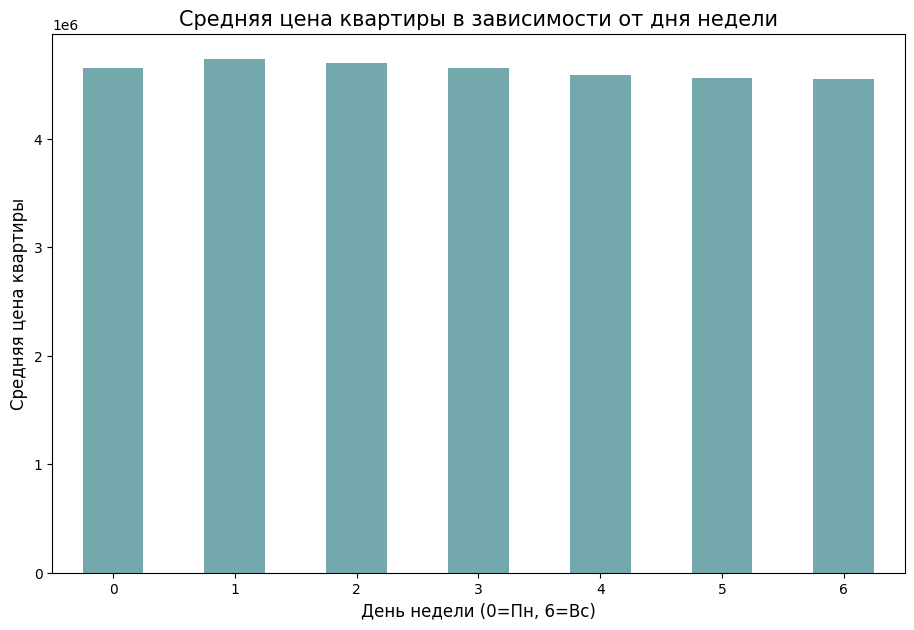

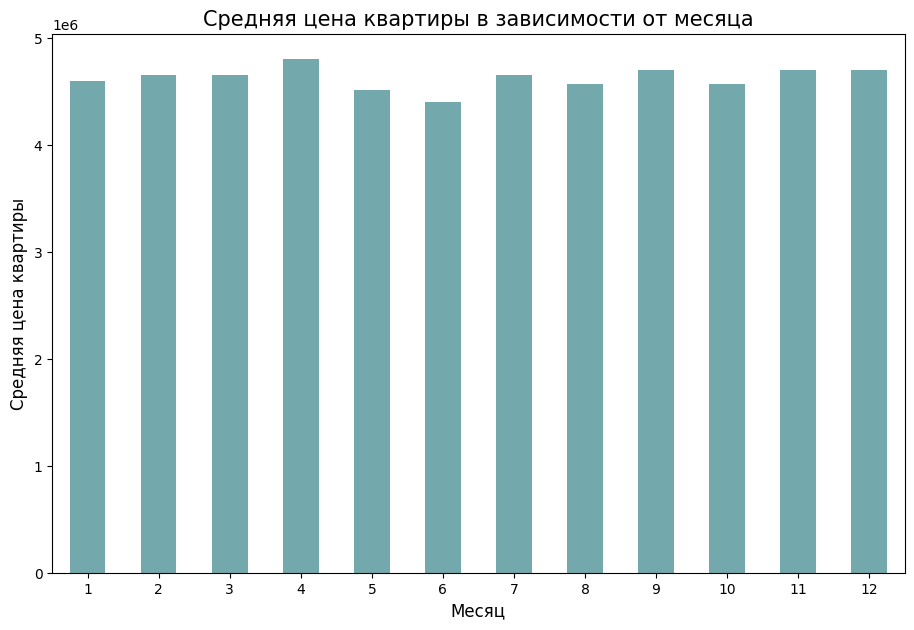

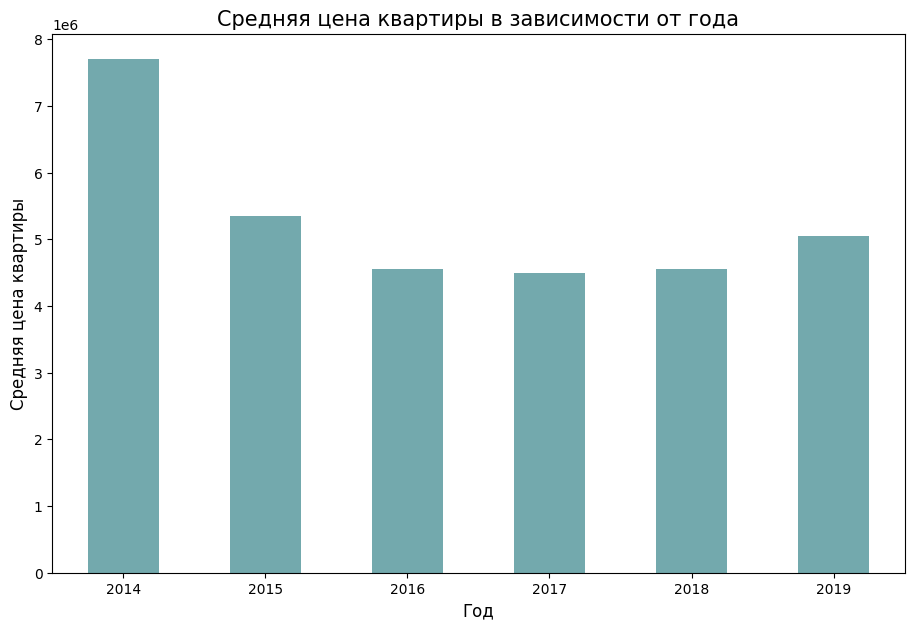

In [45]:
# 1. Преобразование столбца в числовой тип (если еще не сделано)
# Это необходимо, потому что данные выглядят как строки с числами
df['first_day_exposition'] = pd.to_numeric(df['first_day_exposition'], errors='coerce')

# 2. Обработка пропущенных значений, которые могут возникнуть после преобразования
df = df.dropna(subset=['first_day_exposition'])

# 3. Преобразование из Unix epoch time в datetime
# Обратите внимание на единицу измерения ('s' - секунды, 'ms' - миллисекунды, 'us' - микросекунды, 'ns' - наносекунды)
# В данном случае у нас таймстемпы в секундах с дробной частью, поэтому используем 's'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], unit='s', origin='unix')

# 4. Проверка наличия различных дат
print(df['first_day_exposition'].unique())

# Создание новых признаков (день недели, месяц, год)
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

# Зависимость цены от дня недели
plt.figure(figsize=(11, 7))
df.groupby('weekday')['last_price'].median().plot(kind='bar', color='#73A9AD')
plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от дня недели', size=15)
plt.xlabel('День недели (0=Пн, 6=Вс)', size=12)
plt.ylabel('Средняя цена квартиры', size=12)
plt.show()

# Зависимость цены от месяца
plt.figure(figsize=(11, 7))
df.groupby('month')['last_price'].median().plot(kind='bar', color='#73A9AD')
plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от месяца', size=15)
plt.xlabel('Месяц', size=12)
plt.ylabel('Средняя цена квартиры', size=12)
plt.show()

# Зависимость цены от года
plt.figure(figsize=(11, 7))
df.groupby('year')['last_price'].median().plot(kind='bar', color='#73A9AD')
plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от года', size=15)
plt.xlabel('Год', size=12)
plt.ylabel('Средняя цена квартиры', size=12)
plt.show()

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [46]:
# Сначала группируем по названию населенного пункта
grouped = df.groupby('locality_name').agg(
    count=('locality_name', 'size'),  # количество объявлений
    mean_price_per_sqm=('price_per_square_meter', 'mean')  # средняя цена за кв. метр
)

In [47]:
# Выбор 10 населенных пунктов с наибольшим количеством объявлений:

top_10_localities = grouped.nlargest(10, 'count')

In [48]:
# Выделение населенных пунктов с самой высокой и низкой стоимостью квадратного метра:

highest_price_locality = top_10_localities['mean_price_per_sqm'].idxmax()
lowest_price_locality = top_10_localities['mean_price_per_sqm'].idxmin()

highest_price = top_10_localities['mean_price_per_sqm'].max()
lowest_price = top_10_localities['mean_price_per_sqm'].min()

#### Выводим результат

In [49]:
# Вывод результата:

display("Топ-10 населённых пунктов по количеству объявлений и средней цене квадратного метра:")
display(top_10_localities)
display("Населённый пункт с самой высокой средней ценой квадратного метра:")
display(f"{highest_price_locality}: {highest_price:.2f}")
display("Населённый пункт с самой низкой средней ценой квадратного метра:")
display(f"{lowest_price_locality}: {lowest_price:.2f}")

'Топ-10 населённых пунктов по количеству объявлений и средней цене квадратного метра:'

,count,mean_price_per_sqm
locality_name,,
Санкт-Петербург,15721,114849.008793
Мурино,590,86087.512017
Кудрово,472,95324.930508
Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


'Населённый пункт с самой высокой средней ценой квадратного метра:'

'Санкт-Петербург: 114849.01'

'Населённый пункт с самой низкой средней ценой квадратного метра:'

'Выборг: 58141.91'

In [50]:
# Фильтруем квартиры в Санкт-Петербурге
spb_df = df[df['locality_name'] == 'Санкт-Петербург'].copy()

# Удаляем строки, где cityCenters_nearest равно NaN (пропущенное значение)
spb_df = spb_df.dropna(subset=['cityCenters_nearest'])

# Конвертируем расстояние из метров в километры и округляем
spb_df['distance_km'] = (spb_df['cityCenters_nearest'] / 1000).round().astype(int)

# Удаляем нулевые и аномальные значения (если distance = 0 или > 100 км)
spb_df = spb_df[(spb_df['distance_km'] > 0) & (spb_df['distance_km'] <= 50)]

# Группируем по расстоянию и считаем среднюю цену
price_by_distance = (
    spb_df.groupby('distance_km')['last_price']
    .agg(['mean', 'count', 'std'])
    .rename(columns={
        'mean': 'avg_price',
        'count': 'apartments_count',
        'std': 'price_std'
    })
    .reset_index()
)

# Фильтруем расстояния с достаточным количеством данных
price_by_distance = price_by_distance[price_by_distance['apartments_count'] >= 10]

#### Найдем минимальное и максимальное значение

In [51]:
# Найдем минимальную цену
min_price_km = price_by_distance['distance_km'][price_by_distance['avg_price'].idxmin()]
print(f"Самая низкая средняя цена наблюдается на расстоянии {min_price_km} км от центра.")

# Найдем максимальную цену
max_price_km = price_by_distance['distance_km'][price_by_distance['avg_price'].idxmax()]
print(f"Самая высокая средняя цена наблюдается на расстоянии {max_price_km} км от центра.")

Самая низкая средняя цена наблюдается на расстоянии 24 км от центра.
Самая высокая средняя цена наблюдается на расстоянии 1 км от центра.


#### Построим зависимость цены от расстояния до центра 

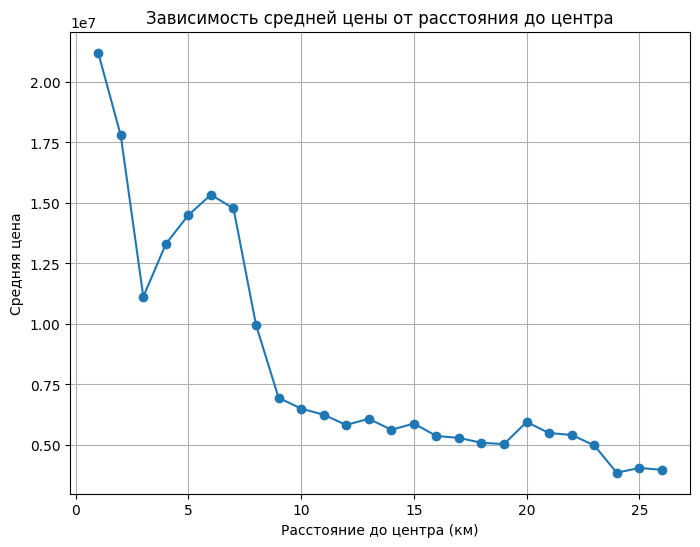

In [52]:
plt.figure(figsize=(8, 6))

plt.plot(price_by_distance['distance_km'], price_by_distance['avg_price'], marker='o')  # 'o' для отображения маркеров

plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена')
plt.title('Зависимость средней цены от расстояния до центра')

plt.grid(True)

plt.show()

#### Комментарий

Судя по графику, стоимость объектов сильно зависит от расстояния до центра города:

•  Ближе к центру (до ~ 3 км): Цены самые высокие.
•  От ~ 3 км до ~ 8 км: Сначала цена падает, потом снова немного растет. Можно предположить, что в этом диапазоне расположены престижные районы, немного удаленные от самого центра, но все еще с хорошей инфраструктурой.
•  Дальше ~ 8 км: Цены резко падают, а затем постепенно снижаются по мере удаления от центра. После 10 км идет плавное снижение.

Таким образом, общая тенденция: чем дальше от центра, тем ниже стоимость недвижимости. Однако есть локальный пик в районе 5-8 км, что может указывать на наличие востребованных районов на этом расстоянии.

## Общий вывод

В результате исследования и анализа данных об объявлениях по продаже квартир были выявлены следующие закономерности:

- Цены на квартиры демонстрируют правостороннее распределение, при этом медианная стоимость заметно ниже средней. Это указывает на наличие дорогих объектов, которые искажают общую статистику.

- Площадь объектов (общая, жилая, кухня) также имеет схожее распределение: большинство квартир располагается в диапазоне до 60–70 м².

- Большинство объектов не имеют балкона (значение близко к нулю у большей части выборки), не являются апартаментами, и в среднем содержат 1–2 комнаты.

- Высота потолков чаще всего составляет 2.5–2.7 метра, хотя в данных встречались и аномальные значения, вызванные либо ошибками ввода, либо отсутствием информации.

- Распределение по этажам относительно равномерное, но с небольшой концентрацией на нижних этажах.

- Большинство объектов были проданы в течение первых 180 дней (примерно полгода), однако также есть объекты с очень длительным временем экспозиции.

- Наличие аномальных и пропущенных значений потребовало дополнительной очистки и логического восстановления (например, заполнение balcony = 0, если не указано количество балконов).

**Среднестатистическая квартира по результатам EDA:
На основании описательной статистики, можно выделить типичный профиль квартиры из выборки:**

1. Цена: ~5.5 млн ₽

2. Общая площадь: ~45 м²

3. Кухня: ~9 м²

4. Комнат: 1–2

4. Балкон: отсутствует

5. Высота потолков: ~2.6 м

6. Тип жилья: не апартаменты

7. Этаж: средний, из 5–9

8. Время экспозиции: около 180 дней

***Важно учесть, что после внесения правок в аномалии и очистки данных (например, более строгого фильтра выбросов или уточнения пропущенных значений), возможно изменение медианных и средних значений — особенно в полях last_price, living_area, kitchen_area, days_exposition. Поэтому финальный вывод нужно будет уточнить после финальной предобработки.***